In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [87]:
data=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [89]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [91]:
data.shape

(5572, 5)

In [93]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## 1. Data cleaning

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [98]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [100]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [104]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
data['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [108]:
encoder=LabelEncoder()

In [110]:
data['target']=encoder.fit_transform(data['target'])

In [112]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [114]:
data['text'].isnull().sum()

0

In [116]:
data.duplicated().sum()

403

In [118]:
data=data.drop_duplicates(keep='first')

In [120]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## 2. EDA

In [123]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

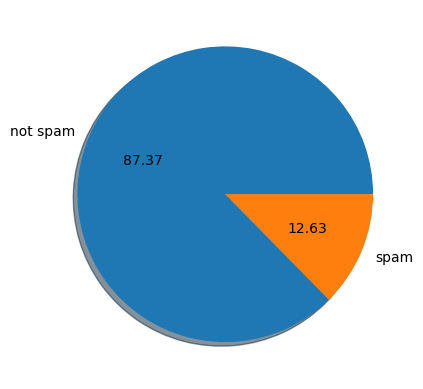

In [125]:
plt.pie(data['target'].value_counts(),labels=['not spam','spam'],shadow=True,autopct='%0.2f')
plt.show()

In [127]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [129]:
data['num_alphabets']=data['text'].apply(lambda x : len(x))

In [131]:
data

,target,text,num_alphabets
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [46]:
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [47]:
data

,target,text,num_alphabets,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [133]:
data['num_sentences']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [135]:
data

,target,text,num_alphabets,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,4
5568,0,Will Ì_ b going to esplanade fr home?,37,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,2
5570,0,The guy did some bitching but I acted like i'd...,125,1


In [137]:
data.describe()

,target,num_alphabets,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,1.965564
std,0.332253,58.236293,1.448541
min,0.000000,2.000000,1.000000
25%,0.000000,36.000000,1.000000
50%,0.000000,60.000000,1.000000
75%,0.000000,117.000000,2.000000
max,1.000000,910.000000,38.000000


In [139]:
data[data['target']==0].describe()

,target,num_alphabets,num_sentences
count,4516.0,4516.000000,4516.000000
mean,0.0,70.459256,1.820195
std,0.0,56.358207,1.383657
min,0.0,2.000000,1.000000
25%,0.0,34.000000,1.000000
50%,0.0,52.000000,1.000000
75%,0.0,90.000000,2.000000
max,0.0,910.000000,38.000000


In [141]:
data[data['target']==1].describe()

,target,num_alphabets,num_sentences
count,653.0,653.000000,653.000000
mean,1.0,137.891271,2.970904
std,0.0,30.137753,1.488425
min,1.0,13.000000,1.000000
25%,1.0,132.000000,2.000000
50%,1.0,149.000000,3.000000
75%,1.0,157.000000,4.000000
max,1.0,224.000000,9.000000


<Axes: xlabel='num_alphabets', ylabel='Count'>

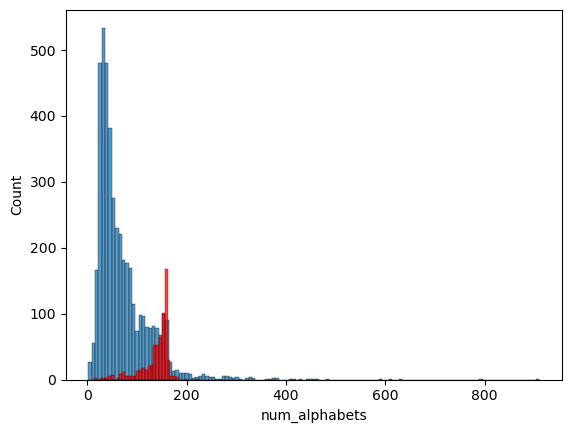

In [143]:
sns.histplot(data[data['target']==0]['num_alphabets'])
sns.histplot(data[data['target']==1]['num_alphabets'],color='red')

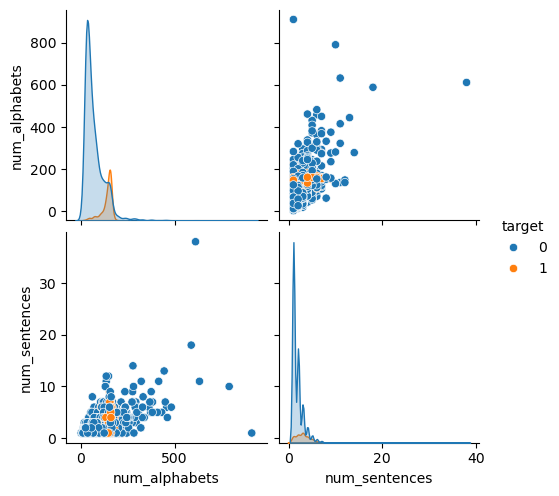

In [145]:
sns.pairplot(data,hue='target')

In [155]:
import nltk
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [157]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if(i.isalnum()):
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if(i not in stopwords.words("english") and i not in string.punctuation):
         y.append(i) 
    text=y[:]
    y.clear()
    stemmer=PorterStemmer()
    for i in text:
        y.append(stemmer.stem(i))
    return " ".join(y)

In [159]:
data['transformed_text']=data['text'].apply(transform_text)


In [161]:
data.head()

,target,text,num_alphabets,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,nah think goe usf live around though


In [163]:
!pip install wordcloud
from wordcloud import WordCloud 

In [165]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [167]:
spam_wc=wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

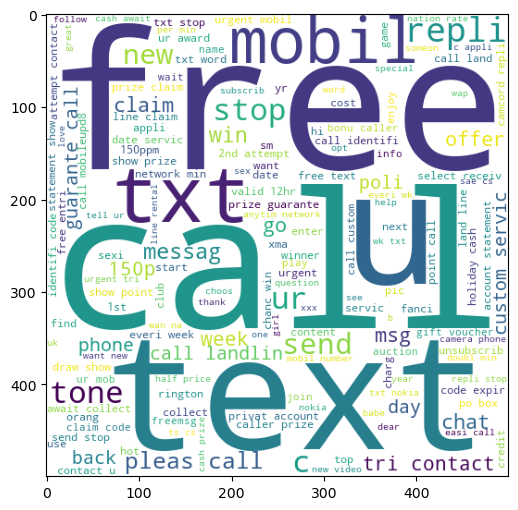

In [169]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [171]:
ham_wc=wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

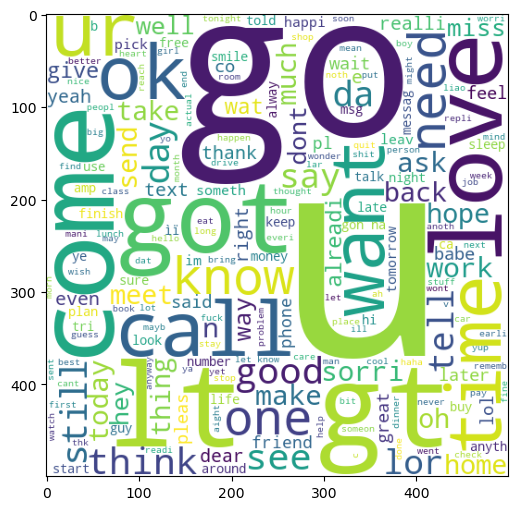

In [173]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [181]:
#Top 30 words for spam messages 
spam_corpus=[]
for text in data[data['target']==1]['transformed_text'].tolist():
    for word in text.split():
        spam_corpus.append(word)

        

In [183]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [185]:
len(spam_corpus)

9939

In [211]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [213]:
#Top 30 words for non-spam messages 
spam_corpus=[]
for text in data[data['target']==0]['transformed_text'].tolist():
    for word in text.split():
        spam_corpus.append(word)


In [215]:
len(spam_corpus)

35404

In [217]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))


,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [219]:
## Model Building

In [281]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [307]:
cv=TfidfVectorizer(max_features=3000)

In [309]:
x=cv.fit_transform(data['transformed_text']).toarray()

In [311]:
x.shape

(5169, 3000)

In [313]:
y=data['target'].values

In [315]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [317]:
from sklearn.model_selection import train_test_split

In [319]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [321]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [323]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [325]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [327]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [329]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [331]:
import pickle 
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
